In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/Titanic_Data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [35]:
df.shape

(891, 12)

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
# Check the data types of the columns:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [39]:
print("Total number of passengers in the training data...", len(df))
print("Number of passengers who survived...", len(df[df["Survived"] == 1]))
print("Number of passengers who didn't survive...", len(df[df["Survived"] == 0]))


Total number of passengers in the training data... 891
Number of passengers who survived... 342
Number of passengers who didn't survive... 549


In [40]:
df['Survived'] ==0

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

In [41]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [44]:
# Check for missing values:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df['Cabin'] = df['Cabin'].fillna('unknown')
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64


In [46]:

# Define a function to remove duplicates
def remove_duplicates(df):
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        df = df.drop_duplicates()
        print(f'{num_duplicates} duplicate rows removed.')
    else:
        print('No duplicate rows found.')
    return df

# Call the function to remove duplicates from the data
clean_data = remove_duplicates(df)

# Print the cleaned DataFrame
print(clean_data)


No duplicate rows found.
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                          

In [47]:
def check_missing_values(df):
    """A function to check for missing values in a DataFrame"""
    missing_val = data.isnull().sum()
    percentage_miss = (missing_val / len(df)) * 100
    missing_data = pd.concat([missing_val, percentage_miss], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data = missing_data[missing_data.iloc[:,1] != 0].sort_values('Percentage', ascending=False).round(2)
    
    return missing_data


In [52]:
def check_missing_values(df):
    """A function to check for missing values in a DataFrame"""
    missing_val = df.isnull().sum()
    percentage_miss = (missing_val / len(df)) * 100
    missing_data = pd.concat([missing_val, percentage_miss], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data = missing_data[missing_data.iloc[:,1] != 0].sort_values('Percentage', ascending=False).round(2)
    
    return missing_data


In [53]:
missing_data = check_missing_values(df)

# Display the DataFrame containing missing values information
print(missing_data)

          Missing Values  Percentage
Age                  177       19.87
Embarked               2        0.22


1. For "Age":
- **Imputation with the Mean or Median:** One common approach is to replace missing values in the "Age" column with the mean or median age of the passengers.

In [54]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

2. For "Embarked":
- **Imputation with Mode:** Since there are only two missing values in the "Embarked" column, we can impute them with the mode (most frequent value) of the column.

In [55]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [57]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Exploratory Data Analysis(EDA)

## 1. Data Exploration

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Visualizations

We can create various visualizations to understand the data. Here are some examples:

### 1. Histogram of Age: Visualize the distribution of passenger ages.

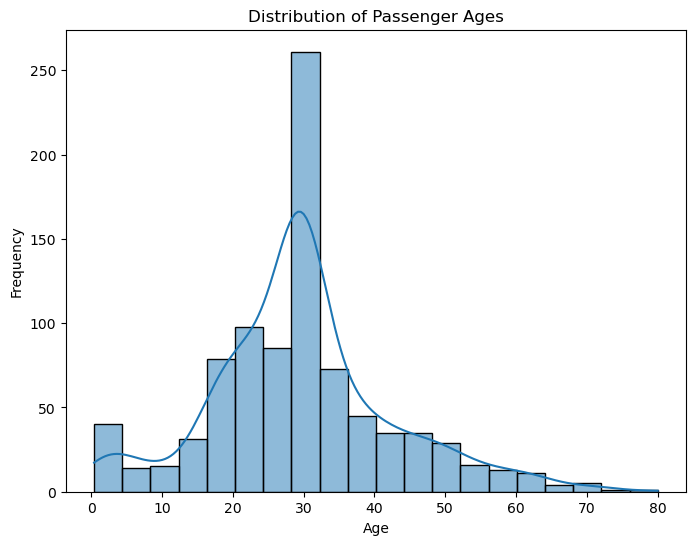

In [61]:
# Import Seaborn and matplotlib
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.show()

### 2. Countplot of Survived: We can Visualize the count of passengers who survived and didn't survive?

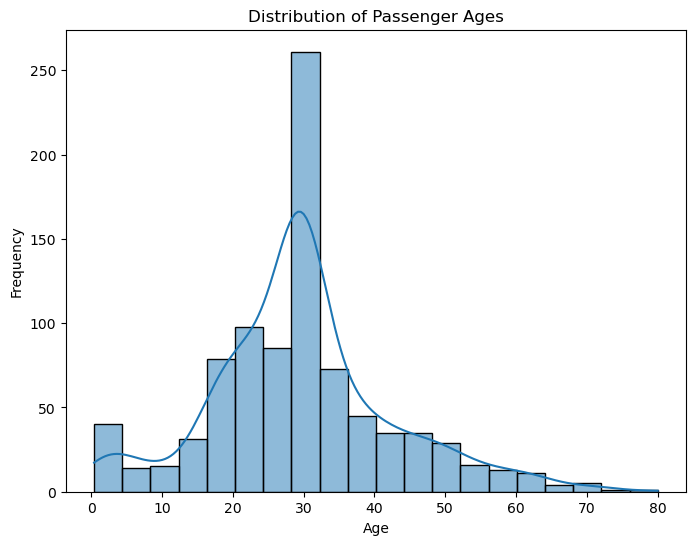

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.show()

### 3. Countplot of Pclass: We can also Visualize the count of passengers in each passenger class.

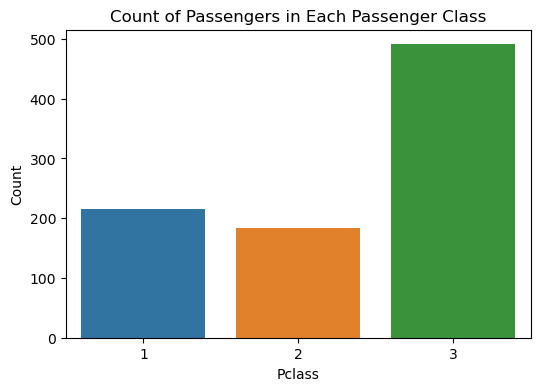

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count of Passengers in Each Passenger Class')
plt.show()


## 3. Correlation Matrix:
We can explore the correlation between numerical variables using a correlation matrix.

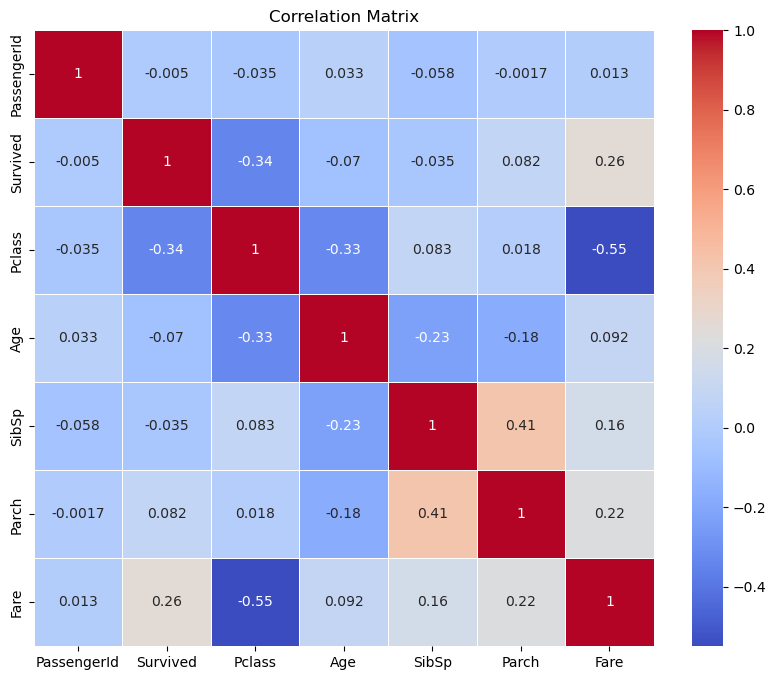

In [65]:
# Select only the numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## 4. Feature Relationships:
We can explore relationships between features using scatter plots, pair plots, or other relevant plots. For example, we can create a pair plot to visualize relationships between numerical variables.

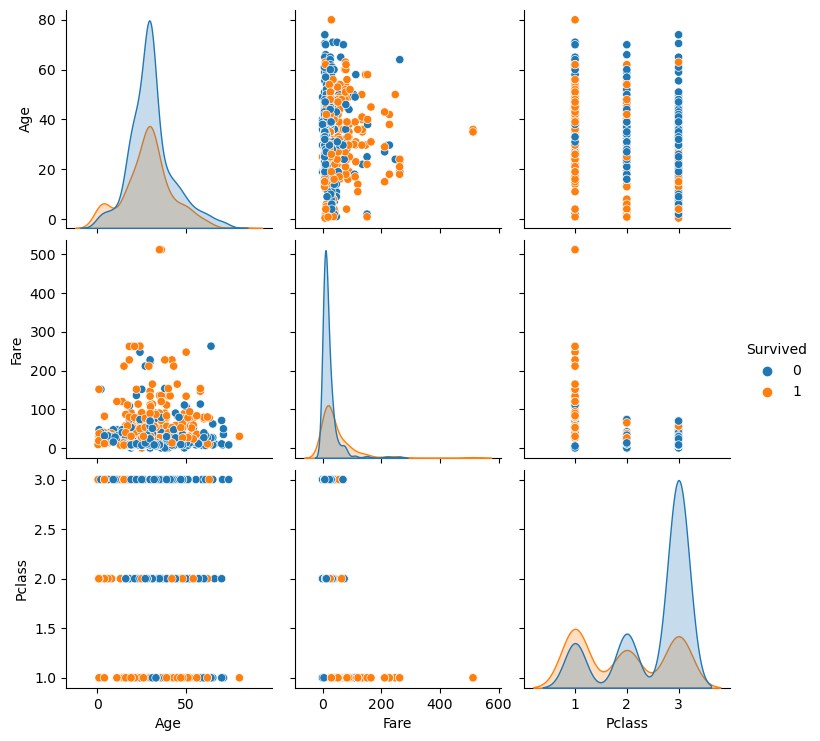

In [66]:
# Pair plot for selected numerical variables
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()